# SMAI Assignment - 3

## Question - `3` : Knowing MLPs

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

## Please read the following before moving on

Welcome to the world of Multilayer Perceptrons (MLP)! You already know that MLPs are feedforward neural networks consisting of multiple layers of nodes or neurons. These networks are well-suited for a wide range of classification and regression tasks, thanks to their ability to learn complex, non-linear relationships between inputs and outputs.

In this assignment, we will be working with the MNIST dataset to explore the importance of different MLP components. The MNIST dataset consists of 70,000 handwritten digit images, each of which is 28x28 pixels in size. Our goal is to use an MLP to classify these images into one of 10 categories (0-9).

To improve the performance of our MLP, we will experiment with various techniques such as Dropout, Batch Normalization, Loss Functions, Stochastic batch and mini-batch gradient descent, and more. Please note, you must use mini-batch unless explicity specified.

In addition, we will experiment with different optimization algorithms such as stochastic gradient descent, Adam, and RMSprop to find the optimal weights and biases for our MLP. We will use stochastic batch and mini-batch gradient descent, which involve updating the weights and biases of the network based on a small batch of randomly sampled training examples, to speed up the training process and reduce memory usage.

By the end of this assignment, you will have gained a deeper understanding of the various components that make up an MLP and their importance in achieving high performance in classification tasks. You will have gained hands-on experience in experimenting with these components and learned how to fine-tune an MLP to achieve the best possible performance on the MNIST dataset. So, let's get started!

🫵Pro-tip: Do not re-write any results so as to re-use them in later experiments for tabulation and plotting.

💭Trivia: Did you know code written using ChatGPT is easy to catch?

### Step zero: Import Libraries

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 15.1 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn

from tqdm import tqdm
from torchmetrics.classification import MulticlassPrecision, MulticlassRecall, MulticlassF1Score, MulticlassConfusionMatrix
from prettytable import PrettyTable

### Step one: Using a PyTorch Dataset
Load MNIST dataset from `torchvision.datasets`

In [ ]:
transform = transforms.Compose([
                    transforms.ToTensor(), 
            ])

trainset = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = transform, 
    download = True,            
)
#TODO use datasets.MNIST
testset = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = transform
)
#TODO

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
trainsplit = int(0.75 * len(trainset))
generator = torch.Generator().manual_seed(1)
trainset, validationset=torch.utils.data.random_split(trainset, [trainsplit, len(trainset) - trainsplit], generator=generator)
print(len(trainset), len(validationset))

45000 15000


In [ ]:
trainloader_minibatch = torch.utils.data.DataLoader(trainset, batch_size=64
                                                    , shuffle=True, num_workers=2)
trainloader_stochastic = torch.utils.data.DataLoader(trainset, batch_size=1
                                                     , shuffle=True, num_workers=2)
testloader_minibatch = torch.utils.data.DataLoader(testset, batch_size=64
                                                    , shuffle=True, num_workers=2)
testloader_stochastic = torch.utils.data.DataLoader(testset, batch_size=1
                                                    , shuffle=True, num_workers=2)
validationloader_minibatch = torch.utils.data.DataLoader(validationset, batch_size=64
                                                    , shuffle=True, num_workers=2)
validationloader_stochastic = torch.utils.data.DataLoader(validationset, batch_size=1
                                                    , shuffle=True, num_workers=2)
#TODO

### Step two: Define a MLP Model and without any bells and whitsles...
... along with a CrossEntropy loss criterion 

Do not use Dropout, BN or any other thing. Use ReLU for hidden layers.

⚠️ Do not use SoftMax in the output as nn.CrossEntropyLoss combines SoftMax and NLLLoss.

In [ ]:
class SimpleMLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(28*28, 450)
    self.layer2 = nn.Linear(450, 200)
    self.layer3 = nn.Linear(200, 10)
    self.relu = nn.ReLU()
  def forward(self,x):
    output = self.layer1(x)
    output = self.relu(output)
    output = self.layer2(output)
    output = self.relu(output)
    output = self.layer3(output)
    return output

### Step three: Define the following optimizers using nn.optim
1. SGD
2. SGD with momentum
3. SGD with L2 regularization
4. RMSprop
5. Adam

In [ ]:
# code here
def opt(model, i):
  if i == 1:
    return 'SGD', torch.optim.SGD(model.parameters(), lr = 0.01)
  if i == 2:
    return 'SGD with Momentum', torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)
  if i == 3:
    return 'SGD with L2 Regularization', torch.optim.SGD(model.parameters(), lr = 0.01, weight_decay=0.01)
  if i == 4:
    return 'RMSprop', torch.optim.RMSprop(model.parameters())
  if i == 5:
    return 'Adam', torch.optim.Adam(model.parameters())

### Step four: Run the SimpleMLP using different optimizers and plot train and test loss for each optimizer.
Explain the results.

Report final accuracy, F1 score and other relavant metrics in a tabular form on test and train datasets.


USING SGD OPTIMISER.



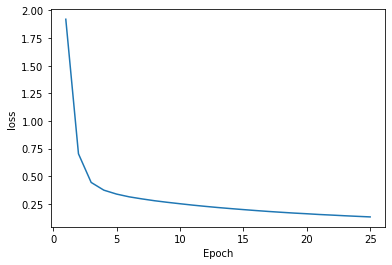

Final loss is 0.13296605105543594
+-----------+-------------------+
|   METRIC  |       Value       |
+-----------+-------------------+
|  Accuracy |     95.9000 %     |
| Precision | 0.800000011920929 |
|   Recall  | 0.800000011920929 |
|  F1 Score | 0.800000011920929 |
+-----------+-------------------+


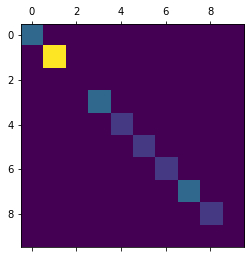


USING SGD with Momentum OPTIMISER.



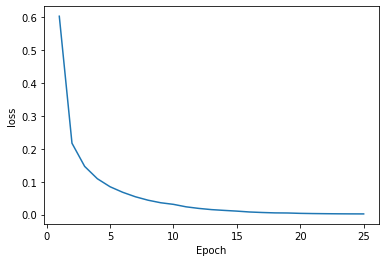

Final loss is 0.0018116228784751083
+-----------+-------------------+
|   METRIC  |       Value       |
+-----------+-------------------+
|  Accuracy |     98.1600 %     |
| Precision | 0.699999988079071 |
|   Recall  | 0.699999988079071 |
|  F1 Score | 0.699999988079071 |
+-----------+-------------------+


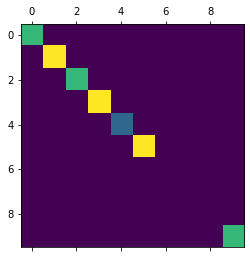


USING SGD with L2 Regularization OPTIMISER.



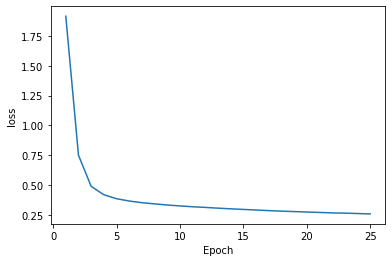

Final loss is 0.2568783055334775
+-----------+--------------------+
|   METRIC  |       Value        |
+-----------+--------------------+
|  Accuracy |     93.5800 %      |
| Precision | 0.8500000238418579 |
|   Recall  | 0.8500000238418579 |
|  F1 Score | 0.8333333730697632 |
+-----------+--------------------+


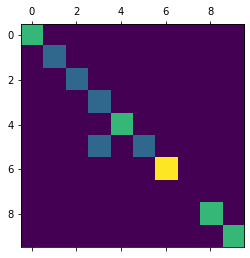


USING RMSprop OPTIMISER.



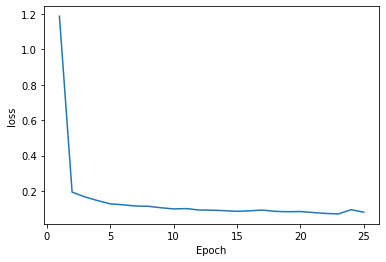

Final loss is 0.0807619701916703
+-----------+-------------------+
|   METRIC  |       Value       |
+-----------+-------------------+
|  Accuracy |     95.6600 %     |
| Precision | 0.800000011920929 |
|   Recall  | 0.800000011920929 |
|  F1 Score | 0.800000011920929 |
+-----------+-------------------+


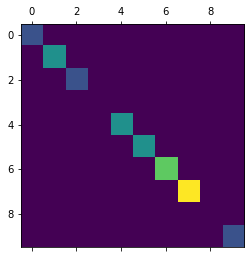


USING Adam OPTIMISER.



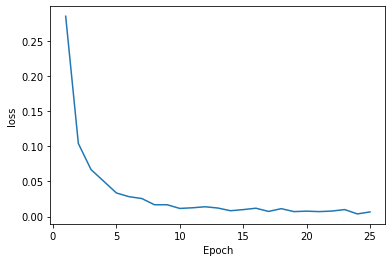

Final loss is 0.006647094746367791
+-----------+-------------------+
|   METRIC  |       Value       |
+-----------+-------------------+
|  Accuracy |     98.0400 %     |
| Precision | 0.800000011920929 |
|   Recall  | 0.800000011920929 |
|  F1 Score | 0.800000011920929 |
+-----------+-------------------+


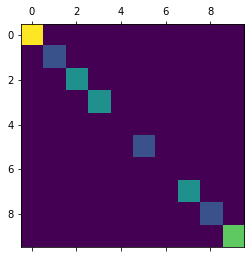

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
epochs = 25
for i in range(1, 6):
  running_loss = []
  val_loss = []
  model = SimpleMLP().to(device)
  opt_name, optimiser = opt(model, i)
  criterion = nn.CrossEntropyLoss()
  print(f'\nUSING {opt_name} OPTIMISER.\n')
  for epoch in range(epochs):
    train_loss = 0
    for batch, (images, labels) in enumerate(trainloader_minibatch):

      images = images.reshape(-1, 28*28).to(device)
      labels = labels.to(device)
      
      outputs = model(images)
      loss = criterion(outputs, labels)  
      
      loss.backward()
      optimiser.step()
      optimiser.zero_grad()

      train_loss += loss.item()
      
    # print(f"Epoch {epoch+1}, loss: {train_loss/len(trainloader_minibatch):.4f}")
    running_loss.append(train_loss/len(trainloader_minibatch))
  plt.plot(list(range(1, 26)), running_loss)
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.show()
  print(f'Final loss is {running_loss[-1]}')
  
  # Test the model: we don't need to compute gradients
  with torch.no_grad():
    n_correct = 0
    n_samples = len(testloader_minibatch.dataset)

    for images, labels in testloader_minibatch:
      images = images.reshape(-1, 28*28).to(device)
      labels = labels.to(device)

      outputs = model(images)

      # max returns (output_value ,index)
      _, predicted = torch.max(outputs, 1)

      metric1 = MulticlassPrecision(num_classes=10, average='macro').to(device)
      precision = metric1(predicted, labels)

      metric2 = MulticlassRecall(num_classes=10, average='macro').to(device)
      recall = metric2(predicted, labels)

      metric3 = MulticlassF1Score(num_classes=10, average='macro').to(device)
      f1score = metric3(predicted, labels)  

      metric4 = MulticlassConfusionMatrix(num_classes=10).to(device)
      conf_mat = metric4(predicted, labels)

      n_correct += (predicted == labels).sum().item()

    acc = n_correct / n_samples

    table = PrettyTable()
    table.field_names = ["METRIC", "Value"]
    table.add_row(["Accuracy", f'{100*acc:.4f} %'])
    table.add_row(["Precision", precision.item()])
    table.add_row(["Recall", recall.item()])
    table.add_row(["F1 Score", f1score.item()])
    print(table)
    # print(f'Accuracy of the network on the {n_samples} test images: {100*acc:.4f} %')
    # print(f'Precision: {precision}')
    # print(f'Recall: {recall}')
    # print(f'F1 Score: {f1score}')
    plt.matshow(conf_mat.to('cpu').numpy())
    plt.show()


### Step five: Using SimpleMLP and Adam optimizer, train models using 2 different lr_schedulers.
Select 2 of **MultiplicativeLR**, **MultiStepLR**, **LinearLR** and **ExponentialLR**

Compare the results among different LR schedulers and the original model which didn't employ any LR scheduler. Compile results in a tabular form. Plot losses for each. Explain results.


USING Adam OPTIMISER with MultiplicativeLR scheduler.



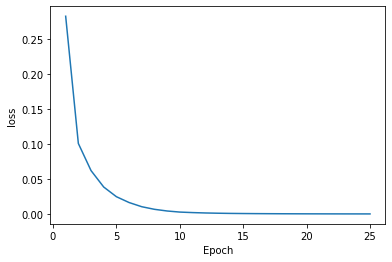

Final loss is 0.00044791593227118523
Accuracy of the network on the 10000 test images: 98.1800 %


In [ ]:
# code and analysis here
epochs = 25
running_loss = []
val_loss = []
model = SimpleMLP().to(device)
opt_name, optimiser = opt(model, 5)
lmda = lambda epoch : 0.8
scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimiser, lr_lambda=lmda)
criterion = nn.CrossEntropyLoss()
print(f'\nUSING {opt_name} OPTIMISER with MultiplicativeLR scheduler.\n')
for epoch in range(epochs):
  train_loss = 0
  for batch, (images, labels) in enumerate(trainloader_minibatch):

    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    
    outputs = model(images)
    loss = criterion(outputs, labels)  
    
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()

    train_loss += loss.item()
    
  # print(f"Epoch {epoch+1}, loss: {train_loss/len(trainloader_minibatch):.4f}")
  scheduler.step()
  running_loss.append(train_loss/len(trainloader_minibatch))
plt.plot(list(range(1, 26)), running_loss)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()
print(f'Final loss is {running_loss[-1]}')

# Test the model: we don't need to compute gradients
with torch.no_grad():
  n_correct = 0
  n_samples = len(testloader_minibatch.dataset)

  for images, labels in testloader_minibatch:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # max returns (output_value ,index)
    _, predicted = torch.max(outputs, 1)
    n_correct += (predicted == labels).sum().item()

  acc = n_correct / n_samples
  print(f'Accuracy of the network on the {n_samples} test images: {100*acc:.4f} %')


USING Adam OPTIMISER with MultiStepLR scheduler.



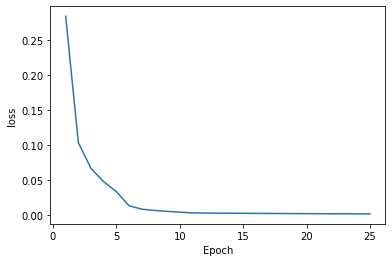

Final loss is 0.001432083279150282
Accuracy of the network on the 10000 test images: 98.3600 %


In [ ]:
# code and analysis here
epochs = 25
running_loss = []
val_loss = []
model = SimpleMLP().to(device)
opt_name, optimiser = opt(model, 5)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimiser, milestones=[5, 10], gamma=0.1)
criterion = nn.CrossEntropyLoss()
print(f'\nUSING {opt_name} OPTIMISER with MultiStepLR scheduler.\n')
for epoch in range(epochs):
  train_loss = 0
  for batch, (images, labels) in enumerate(trainloader_minibatch):

    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    
    outputs = model(images)
    loss = criterion(outputs, labels)  
    
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()

    train_loss += loss.item()
    
  # print(f"Epoch {epoch+1}, loss: {train_loss/len(trainloader_minibatch):.4f}")
  scheduler.step()
  running_loss.append(train_loss/len(trainloader_minibatch))
plt.plot(list(range(1, 26)), running_loss)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()
print(f'Final loss is {running_loss[-1]}')

# Test the model: we don't need to compute gradients
with torch.no_grad():
  n_correct = 0
  n_samples = len(testloader_minibatch.dataset)

  for images, labels in testloader_minibatch:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # max returns (output_value ,index)
    _, predicted = torch.max(outputs, 1)
    n_correct += (predicted == labels).sum().item()

  acc = n_correct / n_samples
  print(f'Accuracy of the network on the {n_samples} test images: {100*acc:.4f} %')

### Step six: Define 3 models with following changes:
1. Add BatchNorm
2. Add Dropout
3. Add BatchNorm and Dropout

In [ ]:
# code here
class MLP_batchNorm(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(28*28, 450)
    self.bnorm1 = nn.BatchNorm1d(450)
    self.layer2 = nn.Linear(450, 200)
    self.bnorm2 = nn.BatchNorm1d(200)
    self.layer3 = nn.Linear(200, 10)
    self.relu = nn.ReLU()
  def forward(self,x):
    output = self.layer1(x)
    output = self.bnorm1(output)
    output = self.relu(output)
    output = self.layer2(output)
    output = self.bnorm2(output)
    output = self.relu(output)
    output = self.layer3(output)
    return output

In [ ]:
class MLP_dropout(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(28*28, 450)
    self.drop1 = nn.Dropout(p=0.1)
    self.layer2 = nn.Linear(450, 200)
    self.drop2 = nn.Dropout(p=0.2)
    self.layer3 = nn.Linear(200, 10)
    self.relu = nn.ReLU()
  def forward(self,x):
    output = self.layer1(x)
    output = self.relu(output)
    output = self.drop1(output)
    output = self.layer2(output)
    output = self.relu(output)
    output = self.drop2(output)
    output = self.layer3(output)
    return output

In [ ]:
class MLP_bnorm_dropout(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(28*28, 450)
    self.bnorm1 = nn.BatchNorm1d(450)
    self.drop1 = nn.Dropout(p=0.25)
    self.layer2 = nn.Linear(450, 200)
    self.bnorm2 = nn.BatchNorm1d(200)
    self.drop2 = nn.Dropout(p=0.5)
    self.layer3 = nn.Linear(200, 10)
    self.relu = nn.ReLU()
  def forward(self,x):
    output = self.layer1(x)
    output = self.bnorm1(output)
    output = self.relu(output)
    output = self.drop1(output)
    output = self.layer2(output)
    output = self.bnorm2(output)
    output = self.relu(output)
    output = self.drop2(output)
    output = self.layer3(output)
    return output

### Step seven: Train the above models and compare with SimpleMLP.

Use your choice of optimizer, use no lr_scheduler so as to re-use the previous results.

Perform analysis. You've got the drill by now.


USING Adam OPTIMISER with batch normalisation.



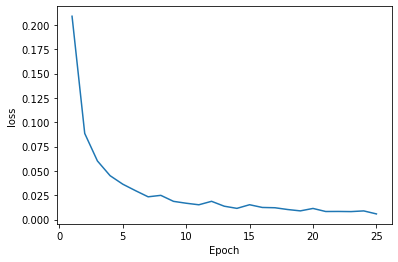

Final loss is 0.005896361293697406
Accuracy of the network on the 10000 test images: 97.8900 %


In [ ]:
# code here
epochs = 25
running_loss = []
val_loss = []
model = MLP_batchNorm().to(device)
opt_name, optimiser = opt(model, 5)
criterion = nn.CrossEntropyLoss()
print(f'\nUSING {opt_name} OPTIMISER with batch normalisation.\n')
for epoch in range(epochs):
  train_loss = 0
  for batch, (images, labels) in enumerate(trainloader_minibatch):

    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    
    outputs = model(images)
    loss = criterion(outputs, labels)  
    
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()

    train_loss += loss.item()
    
  # print(f"Epoch {epoch+1}, loss: {train_loss/len(trainloader_minibatch):.4f}")
  running_loss.append(train_loss/len(trainloader_minibatch))
plt.plot(list(range(1, 26)), running_loss)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()
print(f'Final loss is {running_loss[-1]}')

# Test the model: we don't need to compute gradients
with torch.no_grad():
  n_correct = 0
  n_samples = len(testloader_minibatch.dataset)

  for images, labels in testloader_minibatch:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # max returns (output_value ,index)
    _, predicted = torch.max(outputs, 1)
    n_correct += (predicted == labels).sum().item()

  acc = n_correct / n_samples
  print(f'Accuracy of the network on the {n_samples} test images: {100*acc:.4f} %')


USING Adam OPTIMISER with dropout.



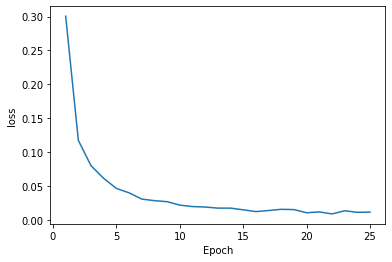

Final loss is 0.012256565500852835
Accuracy of the network on the 10000 test images: 98.0200 %


In [ ]:
# code here
epochs = 25
running_loss = []
val_loss = []
model = MLP_dropout().to(device)
opt_name, optimiser = opt(model, 5)
criterion = nn.CrossEntropyLoss()
print(f'\nUSING {opt_name} OPTIMISER with dropout.\n')
for epoch in range(epochs):
  train_loss = 0
  for batch, (images, labels) in enumerate(trainloader_minibatch):

    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    
    outputs = model(images)
    loss = criterion(outputs, labels)  
    
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()

    train_loss += loss.item()
    
  # print(f"Epoch {epoch+1}, loss: {train_loss/len(trainloader_minibatch):.4f}")
  running_loss.append(train_loss/len(trainloader_minibatch))
plt.plot(list(range(1, 26)), running_loss)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()
print(f'Final loss is {running_loss[-1]}')

# Test the model: we don't need to compute gradients
with torch.no_grad():
  n_correct = 0
  n_samples = len(testloader_minibatch.dataset)

  for images, labels in testloader_minibatch:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # max returns (output_value ,index)
    _, predicted = torch.max(outputs, 1)
    n_correct += (predicted == labels).sum().item()

  acc = n_correct / n_samples
  print(f'Accuracy of the network on the {n_samples} test images: {100*acc:.4f} %')


USING Adam OPTIMISER with batch normalistion and dropout.



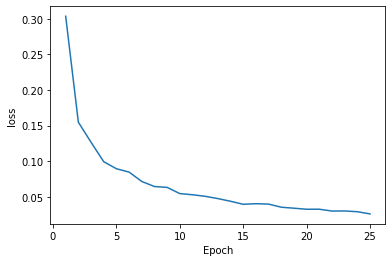

Final loss is 0.025800057797244914
Accuracy of the network on the 10000 test images: 97.1600 %


In [ ]:
# code here
epochs = 25
running_loss = []
val_loss = []
model = MLP_bnorm_dropout().to(device)
opt_name, optimiser = opt(model, 5)
criterion = nn.CrossEntropyLoss()
print(f'\nUSING {opt_name} OPTIMISER with batch normalistion and dropout.\n')
for epoch in range(epochs):
  train_loss = 0
  for batch, (images, labels) in enumerate(trainloader_minibatch):

    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    
    outputs = model(images)
    loss = criterion(outputs, labels)  
    
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()

    train_loss += loss.item()
    
  # print(f"Epoch {epoch+1}, loss: {train_loss/len(trainloader_minibatch):.4f}")
  running_loss.append(train_loss/len(trainloader_minibatch))
plt.plot(list(range(1, 26)), running_loss)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()
print(f'Final loss is {running_loss[-1]}')

# Test the model: we don't need to compute gradients
with torch.no_grad():
  n_correct = 0
  n_samples = len(testloader_minibatch.dataset)

  for images, labels in testloader_minibatch:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # max returns (output_value ,index)
    _, predicted = torch.max(outputs, 1)
    n_correct += (predicted == labels).sum().item()

  acc = n_correct / n_samples
  print(f'Accuracy of the network on the {n_samples} test images: {100*acc:.4f} %')

### Step eight: Mini-batch vs Stocastic
Now that you might have a clear winner in your mind regarding which model and settings perform the best, train it on mini-batch and stocastic and compare time taken, loss curve, accuracy etc.

Perform an analysis like never before!


USING Adam OPTIMISER and Mini batch.



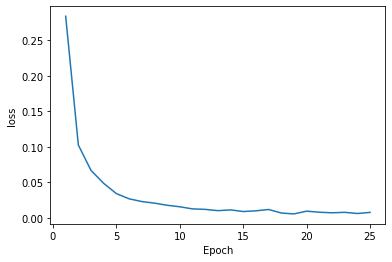

Final loss is 0.00769701575453348
Accuracy of the network on the 10000 test images: 98.0300 %


In [ ]:
# code here
# code and analysis here
epochs = 25
running_loss = []
val_loss = []
model = SimpleMLP().to(device)
opt_name, optimiser = opt(model, 5)
lmda = lambda epoch : 0.8
criterion = nn.CrossEntropyLoss()
print(f'\nUSING {opt_name} OPTIMISER and Mini batch.\n')
for epoch in range(epochs):
  train_loss = 0
  for batch, (images, labels) in enumerate(trainloader_minibatch):

    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    
    outputs = model(images)
    loss = criterion(outputs, labels)  
    
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()

    train_loss += loss.item()
    
  # print(f"Epoch {epoch+1}, loss: {train_loss/len(trainloader_minibatch):.4f}")
  running_loss.append(train_loss/len(trainloader_minibatch))
plt.plot(list(range(1, 26)), running_loss)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()
print(f'Final loss is {running_loss[-1]}')

# Test the model: we don't need to compute gradients
with torch.no_grad():
  n_correct = 0
  n_samples = len(testloader_minibatch.dataset)

  for images, labels in testloader_minibatch:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # max returns (output_value ,index)
    _, predicted = torch.max(outputs, 1)
    n_correct += (predicted == labels).sum().item()

  acc = n_correct / n_samples
  print(f'Accuracy of the network on the {n_samples} test images: {100*acc:.4f} %')


USING Adam OPTIMISER and stochastic.



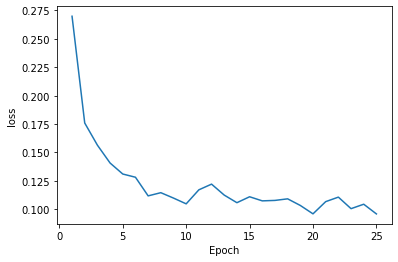

Final loss is 0.09590321045817848
+-----------+--------------------+
|   METRIC  |       Value        |
+-----------+--------------------+
|  Accuracy |     96.8100 %      |
| Precision | 0.7000000476837158 |
|   Recall  | 0.7000000476837158 |
|  F1 Score | 0.7000000476837158 |
+-----------+--------------------+


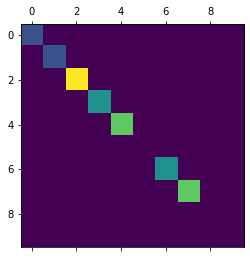

In [ ]:
# code here
# code and analysis here
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
epochs = 25
running_loss = []
val_loss = []
model = SimpleMLP().to(device)
opt_name, optimiser = opt(model, 5)
lmda = lambda epoch : 0.8
criterion = nn.CrossEntropyLoss()
print(f'\nUSING {opt_name} OPTIMISER and stochastic.\n')
for epoch in range(epochs):
  train_loss = 0
  for batch, (images, labels) in enumerate(trainloader_stochastic):

    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    
    outputs = model(images)
    loss = criterion(outputs, labels)  
    
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()

    train_loss += loss.item()
    
  # print(f"Epoch {epoch+1}, loss: {train_loss/len(trainloader_minibatch):.4f}")
  running_loss.append(train_loss/len(trainloader_stochastic))
plt.plot(list(range(1, 26)), running_loss)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()
print(f'Final loss is {running_loss[-1]}')

# Test the model: we don't need to compute gradients
with torch.no_grad():
  n_correct = 0
  n_samples = len(testloader_minibatch.dataset)

  for images, labels in testloader_minibatch:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # max returns (output_value ,index)
    _, predicted = torch.max(outputs, 1)

    metric1 = MulticlassPrecision(num_classes=10, average='macro').to(device)
    precision = metric1(predicted, labels)

    metric2 = MulticlassRecall(num_classes=10, average='macro').to(device)
    recall = metric2(predicted, labels)

    metric3 = MulticlassF1Score(num_classes=10, average='macro').to(device)
    f1score = metric3(predicted, labels)  

    metric4 = MulticlassConfusionMatrix(num_classes=10).to(device)
    conf_mat = metric4(predicted, labels)

    n_correct += (predicted == labels).sum().item()

  acc = n_correct / n_samples

  table = PrettyTable()
  table.field_names = ["METRIC", "Value"]
  table.add_row(["Accuracy", f'{100*acc:.4f} %'])
  table.add_row(["Precision", precision.item()])
  table.add_row(["Recall", recall.item()])
  table.add_row(["F1 Score", f1score.item()])
  print(table)
  # print(f'Accuracy of the network on the {n_samples} test images: {100*acc:.4f} %')
  # print(f'Precision: {precision}')
  # print(f'Recall: {recall}')
  # print(f'F1 Score: {f1score}')
  plt.matshow(conf_mat.to('cpu').numpy())
  plt.show()


***It takes more than a hour to complete! 1 hour 4 min 29 sec to be exact***

### And most importantly!!! What did we learn?
Discuss any and all learnings here. The discussions must be all-encompassing so that we know what did you learn. 

Please do not copy from your friend or copy-paste from the internet. We can see repetitions during evaluations.

In [ ]:
# text here
"""
Multi-Layer Perceptrons (MLPs) are artificial neural networks that have been widely used in machine learning,
such as image recognition, natural language processing, and speech recognition. Some of the key things we 
learn from MLPs are: 
Non-linearity: MLPs can learn non-linear decision boundaries, which allows them to capture 
complex patterns in the input data. This is achieved by applying nonlinear activation functions to the hidden layers,
such as ReLU, sigmoid, or tanh. 
Classification learning: MLPs are able to learn clues about the input that 
are useful for the business at hand. This is achieved through the use of multiple hidden layers, where each layer
learns to transform the input data into an abstract representation that is then used as input to the next layer.
Generalization: MLPs can generalize to new, unseen data, which is critical to their ability to accurately predict new data.
This is achieved through the use of regularization methods, such as weight decay, dropout, or batch normalization,
which help prevent overfitting. 
Optimization: MLPs require efficient optimization algorithms to learn the model parameters
from the training data. commonly used optimization algorithms for MLPs include stochastic gradient descent, momentum-based methods,
and adaptive methods such as RMSprop and Adam. Overall, MLPs are a powerful tool for learning from complex data and
have demonstrated impressive performance in a wide range of machine learning tasks. However, designing and training MLPs
requires careful consideration of various factors such as network architecture, activation functions, regularization techniques,
and optimization algorithms, which can significantly affect the performance of the model.
"""